## Stats 211 Problem set 2

Anh Nguyen Tran

Loan Repayment, Student Aid, and Research Universities: Class Privilege (Homework Example)

February 15, 2024

### 1. Explain any new or revised hypotheses for interval ratio data from your own project or from Charlie's grant and loan repayment data

[Your answer here should explain:
1. What are your dependent variables? Why do they interest you?
2. What are your independent variables? What direction to you hypothesize will be the relationship between your dependent variable and your dependent variables?
3. Why do you think your dependent variables are associated with your independent variables?
4. What are your control variables? Do you think they will show any spurious, intervening, or interactive relationships? Why?]

If you are working with the grant and loan repayment data, formulate hypotheses about:
1. The relationship between state grant aid per student and the level of research at a university
2. The relationship between loan repayment and college net price for low-income students. The later variable is name **netprice4lowincome**

[Anh's Example:
1. My dependent variables are percent loan repayment and in-state tuition. I am interested in examining the cycle of poverty...
2. My independent variables are undergraduate count and selectivity. I hypothesize that the number of undergraduates enrolled at a university has a negative association with the percent of loan repayment. I also hypothesize that the number of undergraduates enrolled at a university has a positive association with the amount of state aid per student. In other words, as the undergraduate count increases, there is a decrease in the percentage of loan repayment and an increase in the amount of state aid per student.......]

### 2. Setting up your session

In the code cell below, do the following:

1. set current directory 
2. set more off 
3. create log file 
4. download the data from its source if it's available online
5. read the data in [preferably only variables you are going to use]

In [1]:
cd "/Users/anhnguyentran/Desktop/GradStats2_Lab"

/Users/anhnguyentran/Desktop/GradStats2_Lab


In [2]:
set more off

(-set more- irrelevant in this version of Stata)


In [3]:
log using "Log for Problem Set 2.log", replace

-------------------------------------------------------------------------------
      name:  <unnamed>
       log:  /Users/anhnguyentran/Desktop/GradStats2_Lab/Log for Problem Set 2.
> log
  log type:  text
 opened on:  14 Feb 2024, 14:00:11


In [4]:
insheet using loanrepay2013_highestresearch.csv, clear

(19 vars, 33 obs)


In [5]:
ds, varwidth(25)

opeid               stabbr              spend_ugd_4yr_low   instatetuition
acceptrate          hgroup              x_aid_bysticker     xstring
y_lo_inc_rpy        upgrntn             sgrnt_low_inc       ystring
lo_inc_debt_mdn     all_under           igrnt_low_inc       markerlabel
instnm              netprice4lowincome  sandigrnt_low_inc


In [6]:
label variable y_lo_inc_rpy "% Loan Repayment"
codebook y_lo_inc_rpy


-------------------------------------------------------------------------------
y_lo_inc_rpy                                                   % Loan Repayment
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [47.9304,78.4337]             Units: .0001
         Unique values: 33                        Missing .: 0/33

                  Mean: 66.2211
             Std. dev.: 8.30001

           Percentiles:     10%       25%       50%       75%       90%
                        56.1845   60.4167   67.2012   73.6202   75.6098


In [9]:
// NOTE: This is a dependent variable you do not need for hw :)

label variable instatetuition "In-state Tuition for each Institution"
codebook instatetuition


-------------------------------------------------------------------------------
instatetuition                            In-state Tuition for each Institution
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [5647.7734,16535.955]         Units: .0001
         Unique values: 23                        Missing .: 0/33

                  Mean: 10526.8
             Std. dev.:  2454.7

           Percentiles:     10%       25%       50%       75%       90%
                        7657.99   8985.73   9905.68   12355.8   13324.3


In [7]:
// NOTE: This example uses a different independent variable from Charlie's data than the one you need

label variable all_under "Undergraduate Count"
codebook all_under


-------------------------------------------------------------------------------
all_under                                                   Undergraduate Count
-------------------------------------------------------------------------------

                  Type: Numeric (long)

                 Range: [55740,169404]                Units: 1
         Unique values: 33                        Missing .: 0/33

                  Mean:  106268
             Std. dev.: 29157.6

           Percentiles:     10%       25%       50%       75%       90%
                          73258     80273    106338    127554    146122


In [8]:
// NOTE: This is another independent variable you do not need :)

label variable acceptrate "Acceptance Rate"
codebook acceptrate

**Creating selectivity independent variable
gen selective=acceptrate
replace selective=2 if selective > 0 & selective < 0.5
replace selective=1 if selective > 0 & selective < 0.8
replace selective=0 if selective > 0 & selective < 1.0
label define selective 0 "not selective" 1 "slightly selective" 2 "selective"
label values selective selective

tab selective


-------------------------------------------------------------------------------
acceptrate                                                      Acceptance Rate
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [.21463495,.91753805]         Units: 1.000e-08
         Unique values: 33                        Missing .: 0/33

                  Mean: .584394
             Std. dev.:  .18895

           Percentiles:     10%       25%       50%       75%       90%
                        .339553   .453192   .594614   .726273    .84045
(12 real changes made)
(15 real changes made)
(6 real changes made)

         selective |      Freq.     Percent        Cum.
-------------------+-----------------------------------
     not selective |          6       18.18       18.18
slightly selective |         15       45.45       63.64
         selective |         12       36.36      100.00
-------------------+-

### 3. Create a bar graph with confidence interval whiskers

Create a bar graph that compares interval ratio data for a dependent variable across different nominal categories from an independent variable. If you are using Charlie's data, do this for the state grant aid per low income student variable name **sgrnt_low**

In [10]:
// Creating the variables for the confidence interval whiskers by selectivity for in-state tuition

*1) Calculate the mean for in-state tuition
bysort selective: egen mn_instatetuition=mean(instatetuition)

In [11]:
*2) Calculate squared deviations for in-state tuition

gen sqdv_instatetuition=(instatetuition-mn_instatetuition)^2

In [12]:
*3) Collapsing the dataset

collapse ///
(count) n=instatetuition ///
(first) mn_instatetuition ///
(sum) ssqdv_instatetuition= sqdv_instatetuition ///
, by(selective)

In [13]:
*4) Calculate standard deviation for in-state tuition

gen sd_instatetuition=sqrt(ssqdv_instatetuition/(n-1))

In [14]:
*5) Calculate standard error for in-state tuition

gen se_instatetuition= sd_instatetuition/sqrt(n-1)

In [15]:
*6) Creating the whiskers for the confidence interval in the bar graph

generate hi_instatetuition = mn_instatetuition + 1.96 * se_instatetuition
generate lo_instatetuition = mn_instatetuition - 1.96 * se_instatetuition

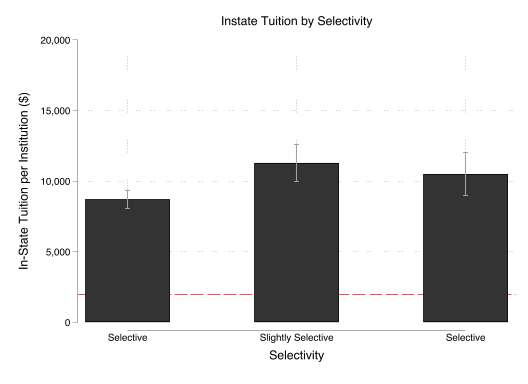

In [16]:
*7) Finally creating the bar graph with whiskers

graph twoway (bar mn_instatetuition selective, barw(.5)) ///
(rcap hi_instatetuition lo_instatetuition selective) , ///
xlabel( 0 "Selective" 1 "Slightly Selective" 2 "Selective", noticks) ///
ytitle("In-State Tuition per Institution ($)") ///
ylabel(0(5000)20000, format(%10.0fc)) ///
xtitle("Selectivity") legend(off) name(igrntbar, replace) ///
title("Instate Tuition by Selectivity")  ///
yline(1936.825, lp(_) lcolor(red) lstyle(foreground)) scheme(plotplainblind)

In [17]:
// NOTE: This is just for me to show you what it means when confidence intervals overlap.

*Reloading the data after collapsing
insheet using loanrepay2013_highestresearch.csv, clear

**Creating selectivity independent variable
gen selective=acceptrate
replace selective=2 if selective > 0 & selective < 0.5
replace selective=1 if selective > 0 & selective < 0.8
replace selective=0 if selective > 0 & selective < 1.0
label values selective selective

(19 vars, 33 obs)
(12 real changes made)
(15 real changes made)
(6 real changes made)


In [18]:
// NOTE: Again, you don't need this for the homework in this section. This is just for the example

reg instatetuition selective


      Source |       SS           df       MS      Number of obs   =        33
-------------+----------------------------------   F(1, 31)        =      1.11
       Model |  6681694.86         1  6681694.86   Prob > F        =    0.2996
    Residual |   186136748        31  6004411.22   R-squared       =    0.0347
-------------+----------------------------------   Adj R-squared   =    0.0035
       Total |   192818443        32  6025576.34   Root MSE        =    2450.4

------------------------------------------------------------------------------
instatetui~n | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
   selective |   628.6128   595.9023     1.05   0.300    -586.7381    1843.964
       _cons |   9783.902   823.3574    11.88   0.000     8104.654    11463.15
------------------------------------------------------------------------------


### 4. Summarize what you learned from the bar graph

Do the confidence intervals overlap across categories or not? What does this mean?

The confidence intervals overlap for slightly selective and selective universities. This indicates that the relationship between selectivity and in-state tuition is not statistically significant. In other words, there is no association between selectivity and in-state tuition. 

### 4. Estimate OLS regression statistics for the relationship between two interval ratio variables and ouput the table below

If you use Charlie's data, use the loan repayment variable and the **netprice4lowincome** variable.

In [19]:
insheet using loanrepay2013_highestresearch.csv, clear
ds, varwidth(25)

(19 vars, 33 obs)
opeid               stabbr              spend_ugd_4yr_low   instatetuition
acceptrate          hgroup              x_aid_bysticker     xstring
y_lo_inc_rpy        upgrntn             sgrnt_low_inc       ystring
lo_inc_debt_mdn     all_under           igrnt_low_inc       markerlabel
instnm              netprice4lowincome  sandigrnt_low_inc


In [20]:
// Doing regression analysis between percent loan repayment and undergraduate count

reg y_lo_inc_rpy all_under


      Source |       SS           df       MS      Number of obs   =        33
-------------+----------------------------------   F(1, 31)        =      1.87
       Model |  125.670787         1  125.670787   Prob > F        =    0.1809
    Residual |   2078.8145        31  67.0585322   R-squared       =    0.0570
-------------+----------------------------------   Adj R-squared   =    0.0266
       Total |  2204.48528        32  68.8901651   Root MSE        =    8.1889

------------------------------------------------------------------------------
y_lo_inc_rpy | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
   all_under |   -.000068   .0000496    -1.37   0.181    -.0001692    .0000333
       _cons |   73.44366   5.465171    13.44   0.000     62.29737    84.58995
------------------------------------------------------------------------------


In [21]:
// NOTE: I am showing you how to manually calculate F-ratio (this is just for lab; not needed for hw)

*1) Calculate mean for both variables
egen X_mean=mean(all_under)
egen Y_mean=mean(y_lo_inc_rpy)

*2) Calculate covariances between variables per school
gen covars_xy=(all_under - X_mean) * (y_lo_inc_rpy - Y_mean)

*3) Calculate squared deviations of undergraduate count (independent var.) per school
gen sq_dev_x_s2=(all_under - X_mean)^2

In [22]:
*4) Calculating sum of covariances

qui {
summarize covars_xy // calculate the sum of covariances for all 33 schools
local sum_s_xy=r(sum)
summarize sq_dev_x_s2 // calculate the sum of squared deviations for X for all 33 schools
local sum_variance_x_s2=r(sum)
local s_xy = round(`sum_s_xy' / (33-1), .01) // calculate covariance of xy
local s2_x = round(`sum_variance_x_s2' / (33-1), .01) // calculate variance of X
}

In [23]:
*5) Calculating Y_hat for regression formula (do after getting regression output)

gen Y_hat_loanrpy = 73.44 + -.000068 * all_under
gen sqdvY_mean = (y_lo_inc_rpy - Y_mean)^2
gen sqdvY_hat = (y_lo_inc_rpy - Y_hat_loanrpy)^2

In [24]:
*6) Summing up ssquared deviations and squared errors

qui {
summarize sqdvY_mean // calculate SST, the sum of squared deviations from the mean of Y for all 33 schools
local sst_Y=r(sum)
summarize sqdvY_hat // calculate SSE, the sum of squared errors (residuals) for all 33 schools
local sse_Y=r(sum)
}

In [25]:
*7) Finally calculating the F-ratio

display "f_ratio =" ((`sst_Y' - `sse_Y')/1) / (`sse_Y' / (33-2))

// You can calculate r-squared manually too with the following command:
* display "r2 (r-squared) = " (`sst_Y' - `sse_Y') / `sst_Y' // calculate r_2 r squared

f_ratio =1.8740168


### Helpful Guides for F-Ratio

Website instructions for following along with manual calculations:
* Link: https://jukebox.esc13.net/untdeveloper/RM/Stats_Module_4/mobile_pages/Stats_Module_410.html

F-ratio calculator
* Link: https://www.statology.org/f-distribution-calculator/

### 5. Interpret the output

1. What is the coefficient for your independent variable? What does it say about the size and direction of the relationship you estimated?

2. What is the p-value for the coefficient for your independent variable? What does it indicate about how much confidence we can have in the estimated relationship?

3. What is the $r^2$ coefficient of determination? What does it say about how much variation in your dependent variable is explained by the independent variable?

4. What is the F-ratio for your $r^2$. What does it indicate about how much confidence we can have in the $r^2$ estimate?



Example answer:
1. The coefficient estimate for undergraduate count is -6.80e-5. There is a small, negative relationship...
2. The p-value for this relationship is less than 0.05, which indicates that the relationship is not statistically significant.
As such, we do not have much confidence in an association between...
3. The coefficient of determination is 0.057. This means that 5.7% of the variation in percent loan repayment...
4. The F-ratio is 1.87. The low F-ratio indicates that we have low confidence in the r-squared estimate.

### 6. Illustrate the OLS relationship with a scatter plot that includes a fitted line

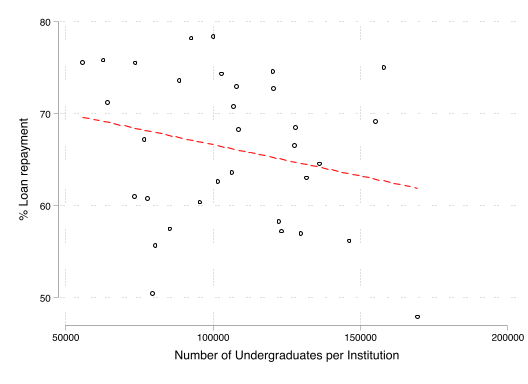

In [26]:
// Anh's Example: Creating a scatter plot with a fitted line for loan repayment and undergrad count

tw (scatter y_lo_inc_rpy all_under) ///
(lfit y_lo_inc_rpy all_under, color(red)), ///
ytitle("% Loan repayment") ///
xtitle("Number of Undergraduates per Institution") legend(off) scheme(plotplainblind)

// Notice how the relationship is negative (as seen in the regression table)
// The values are all over the place, which shows how the fitted line is not very good

In [ ]:
log close